In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.float_format', lambda x : '%.3f' % x)
pd.set_option('max_columns', None)

df = pd.read_csv("../inflearn_pandas_part1_material/my_data/fin_statement_new.csv")
df = df.rename(columns={
    "DPS(보통주, 현금+주식, 연간)": "DPS",
    "P/E(Adj., FY End)": "PER",
    "P/B(Adj., FY End)": "PBR",
    "P/S(Adj., FY End)": "PSR",
})
df = df.drop(["상장일"], axis=1)

yearly_price_df = df.pivot(index="year", columns="Name", values="수정주가")
yearly_rtn_df = yearly_price_df.pct_change(fill_method=None).shift(-1)
yearly_rtn_df.head()

yearly_price_df['AD모터스'].pct_change(fill_method=None).shift(-1)

Name     3S  3SOFT  3노드디지탈  AD모터스    AJS  AJ네트웍스  AJ렌터카  AK홀딩스  APS홀딩스  AP시스템  \
year                                                                            
2006 -0.173 -0.172     NaN -0.199  0.760     NaN    NaN  1.007  -0.113    NaN   
2007 -0.236 -0.828     NaN -0.848 -0.620     NaN    NaN -0.659  -0.016    NaN   
2008  1.219 -0.995   1.215  2.734  2.377     NaN    NaN  0.170   0.241    NaN   
2009  1.783    NaN   0.040 -0.212 -0.383     NaN    NaN  1.127   0.787    NaN   
2010  6.677    NaN  -0.504 -0.458 -0.353     NaN    NaN  0.154   0.702    NaN   

Name  AP우주통신  AP위성  BGF    BHK    BYC  C&S자산관리   C&우방  C&중공업     CJ  CJ CGV  \
year                                                                          
2006  -0.969   NaN  NaN -0.433  0.400    1.474  0.452  0.589  0.384  -0.397   
2007     NaN   NaN  NaN -0.917 -0.355   -0.411 -0.944 -0.856 -0.515   0.178   
2008     NaN   NaN  NaN -0.962 -0.077   -0.388 -0.339 -0.755  0.568   0.447   
2009     NaN   NaN  NaN    NaN  0.288   -0.272    NaN    NaN  0.258   0.273   
2010     NaN   NaN  NaN    NaN -0.043   -0.161    NaN    NaN -0.024  -0.048   

Name  CJ E&M  CJ대한통운  CJ씨푸드  CJ엔터테인  CJ오쇼핑  CJ인터넷  CJ제일제당  CJ프레시웨이  CJ헬로  \
year                                                                       
2006     NaN   0.078 -0.122     NaN -0.319 -0.337     NaN   -0.145   NaN   
2007     NaN  -0.119 -0.585     NaN -0.250 -0.248     NaN   -0.470   NaN   
2008     NaN  -0.151  0.926     NaN  0.972  0.140   0.148    2.146   NaN   
2009     NaN   0.661  1.274     NaN  0.611  0.174   0.056   -0.164   NaN   
2010     NaN  -0.204  0.142     NaN  0.117    NaN   0.334    1.137   NaN   

Name     CL  CMG제약     CS  CSA 코스믹  CS홀딩스   CT&T   CU전자     DB  DB라이텍  DB하이텍  \
year                                                                           
2006 -0.515 -0.119 -0.377      NaN  0.360 -0.555 -0.165  0.357 10.734 -0.523   
2007 -0.862 -0.804 -0.593   -0.119 -0.332 -0.903 -0.568 -0.535 -0.168 -0.608   
2008 -0.350  0.305  0.869   -0.079  0.593 -0.200  0.544  0.933 -0.168  0.870   
2009 -0.984 -0.458  1.055   -0.156  0.627  1.089 -0.293  0.448 -0.106  0.528   
2010    NaN -0.008  0.271   -0.026 -0.449 -0.962 -0.600 -0.522 -0.666 -0.329   

Name    DMS  DRB동일  DSR  DSR제강     E1     EG    EMW    F&F  FnC코오롱    GBS  \
year                                                                        
2006  0.364  0.053  NaN  1.139  2.099  0.176 -0.429 -0.130   0.406  0.081   
2007 -0.420 -0.437  NaN -0.182 -0.462 -0.166 -0.515 -0.283  -0.574 -0.939   
2008  0.288  4.473  NaN  1.173 -0.030  0.612  3.652  0.058   0.227 -0.991   
2009  0.358 -0.183  NaN -0.156 -0.193  1.289 -0.138  0.751     NaN    NaN   
2010 -0.475  0.510  NaN -0.152 -0.029  0.663 -0.481  0.205     NaN    NaN   

Name  GH신소재    GKL   GK파워  GMR 머티리얼즈  GRT     GS    GST   GS건설  GS글로벌  GS리테일  \
year                                                                           
2006    NaN    NaN -0.677     -0.096  NaN  0.930  0.081  0.877 -0.075    NaN   
2007    NaN    NaN -0.719     -0.829  NaN -0.537 -0.687 -0.628 -0.191    NaN   
2008    NaN    NaN -0.789     -0.706  NaN  0.257  0.701  0.871  2.867    NaN   
2009    NaN    NaN    NaN     -0.690  NaN  0.929  0.744  0.069 -0.051    NaN   
2010    NaN -0.119    NaN      0.351  NaN -0.222  0.180 -0.206 -0.404    NaN   

Name  GS홈쇼핑   GT&T  H1바이오  HB테크놀러지    HRS  IC코퍼레이션    IDH    IHQ   ISC  \
year                                                                     
2006 -0.190 -0.241 -0.064   -0.405  0.389   -0.678 -0.228 -0.507   NaN   
2007 -0.288 -0.589 -0.812   -0.788 -0.628   -0.674 -0.946 -0.541   NaN   
2008  0.793  0.553 -0.958    1.719  0.259   -0.810 -0.830 -0.318 0.579   
2009  0.274 -0.049    NaN    0.330  0.549      NaN    NaN  0.714 0.125   
2010  0.061 -0.295    NaN   -0.297 -0.337      NaN    NaN  1.119 0.690   

Name  ITX엠투엠     JS  JW생명과학   JW신약  JW중외제약  JW홀딩스  JYP Ent.  KB오토시스    KCC  \
year                                                                         
2006    

year
2006   -0.199
2007   -0.848
2008    2.734
2009   -0.212
2010   -0.458
2011   -0.823
2012      NaN
2013      NaN
2014      NaN
2015      NaN
2016      NaN
2017      NaN
Name: AD모터스, dtype: float64

In [33]:
def get_return_series(selected_return_df):
    rtn_series = selected_return_df.mean(axis=1)
    rtn_series.loc[2005] = 0     # 주의: 영상속의 데이터와는 달리, 새로 업로드 된 데이터는 2006부터 존재하므로
                                 # 2004가 아니라 2005를 0으로 설정한 점에 주의해주세요
    rtn_series = rtn_series.sort_index()

    cum_rtn_series = (rtn_series + 1).cumprod().dropna()
    return rtn_series, cum_rtn_series

In [34]:
def plot_return(cum_rtn_series, rtn_series):
    fig, axes = plt.subplots(nrows=2, figsize=(15, 6), sharex=True)
    axes[0].plot(cum_rtn_series.index, cum_rtn_series, marker='o');
    axes[1].bar(rtn_series.index, rtn_series);
    axes[0].set_title("Cum return(line)");
    axes[1].set_title("Yearly return(bar)");

# 5. 강환국의 "할수있다 퀀트투자" 구현해보기

## 5.1. quantile + top10

- Filter + Selector 구조
    - Filter
        - e.g. 부채비율 0.5 이상
        - 최종 포트폴리오 종목 갯수 선정에 직접적으로 영향 X
    - Select
        - 최종적으로 XX개의 종목이 선택의 기준이 되는 indicator
        - e.g. PBR이 0.2이상이면서, PBR이 가장 낮은 주식순으로 20~30개 매수

## 5.2. 투자전략22. 소형주 + 저PBR 전략

- Filter
    - 소형주 (시가총액 하위 20%)
- Select
    - (PBR 0.2 이상) // select의 기준이 되기도 하므로
    - PBR이 가장 낮은 주식순으로 20~30개 매수

In [35]:
#
# Filter
#

market_cap_quantile_series = df.groupby("year")['시가총액'].quantile(.2) # 년도별 시가총액 하위 20% 수치
market_cap_quantile_series

year
2006   24661836580.000
2007   28279300000.000
2008   24283951632.000
2009   17405536920.000
2010   25180324846.000
2011   28192790880.000
2012   30077589803.000
2013   33819166404.000
2014   35391903298.400
2015   46836178000.000
2016   54850060350.000
2017   61753217430.000
Name: 시가총액, dtype: float64

In [36]:
filtered_df = df.join(market_cap_quantile_series, on="year", how="left", rsuffix="20%_quantile")
filtered_df = filtered_df[filtered_df['시가총액'] <= filtered_df['시가총액20%_quantile']]
filtered_df

,Code,Name,결산월,시가총액,유통시가총액,PER,PBR,PSR,"P/FCF1(Adj., FY End)",EV/EBITDA,EV/EBIT,DPS,year,수정주가,ROA,비유동부채,자산총계,시가총액20%_quantile
21,A000440,중앙에너비스,12,15198600000.000,5828663100.000,12.560,0.370,0.170,15.080,7.600,10.190,800.000,2006,5234,3.470,4359080.000,51819700.000,24661836580.000
34,A000760,이화산업,12,11158000000.000,5161690800.000,-0.980,0.270,0.180,-9.360,-5.830,-5.530,0.000,2006,3965,-9.840,1457925.000,93661256.000,24661836580.000
40,A000910,유니온,12,19769831000.000,8811413677.000,22.400,0.320,0.370,5.070,6.730,18.710,500.000,2006,1632,0.660,4516111.000,95440233.000,24661836580.000
44,A001000,신라섬유,12,15450000000.000,8503680000.000,-53.000,1.680,14.950,-13.330,-72.110,-59.790,0.000,2006,1120,0.300,25672808.000,39723341.000,24661836580.000
52,A001140,국보,12,9553927200.000,6067699165.000,258.790,0.550,0.140,3.660,6.750,17.780,0.000,2006,800,0.870,12534042.000,71494973.000,24661836580.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19728,A237750,피앤씨테크,12,60808176000.000,27825821338.000,9.510,1.160,1.710,17.100,3.310,3.460,NaN,2017,8320,20.250,1368725.000,27009394.000,61753217430.000
19731,A238120,로고스바이오,12,55897958200.000,32135736169.000,-31.800,2.510,10.500,-21.670,-31.550,-25.340,NaN,2017,6228,-3.770,530860.000,6960100.000,61753217430.000
19744,A250060,모비스,12,46862508820.000,22156594170.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,1720,15.970,1454551.000,8819202.000,61753217430.000
19754,A900110,이스트아시아홀딩스,12,46282665000.000,32160435429.000,-8.510,0.450,0.750,6.580,3.160,2.520,10.000,2017,686,1.590,NaN,NaN,61753217430.000


In [37]:
#
# Selector
#
filtered_df = filtered_df[filtered_df['PBR'] >= 0.2] # 1. PBR 0.2 이상

smallest_pbr_series = filtered_df.groupby("year")['PBR'].nsmallest(15)
smallest_pbr_series

year       
2006  882     0.220
      359     0.250
      433     0.250
      1012    0.250
      341     0.260
               ... 
2017  18546   0.400
      18015   0.410
      18188   0.420
      18043   0.430
      18712   0.430
Name: PBR, Length: 180, dtype: float64

In [38]:
selected_index = smallest_pbr_series.index.get_level_values(1) # 종목 인덱스만 추출
filtered_df.loc[selected_index]

selector_df = filtered_df.loc[selected_index].pivot(
    index='year', columns="Name", values="PBR"
)

selector_df

,Code,Name,결산월,시가총액,유통시가총액,PER,PBR,PSR,"P/FCF1(Adj., FY End)",EV/EBITDA,EV/EBIT,DPS,year,수정주가,ROA,비유동부채,자산총계,시가총액20%_quantile
882,A037240,평안물산,12,21150000000.000,20498580000.000,-0.360,0.220,0.310,-1.850,-4.440,-4.060,0.000,2006,113846,-27.230,4493833.000,24299630.000,24661836580.000
359,A008830,대동기어,12,7190019200.000,3925750483.000,19.210,0.250,0.080,0.900,3.000,13.610,250.000,2006,1842,1.190,8026964.000,58404722.000,24661836580.000
433,A011300,성안,12,17626077700.000,10750144789.000,44.760,0.250,0.230,3.010,9.790,16.140,0.000,2006,329,3.520,6863195.000,126931054.000,24661836580.000
1012,A044180,KD건설,12,23511000000.000,16793907300.000,18.050,0.250,0.180,-1.660,8.910,27.250,0.000,2006,1166603,1.250,13932463.000,45560783.000,24661836580.000
341,A008110,대동전자,3,22100000000.000,14292070000.000,26.800,0.260,0.960,-9.680,-15.950,138.700,0.000,2006,2411,-1.860,11293319.000,90318981.000,24661836580.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18546,A028080,휴맥스홀딩스,12,57856527600.000,29072905119.000,-36.020,0.400,15.650,8.900,-99.160,-97.490,NaN,2017,4640,-10.240,5060142.000,179738302.000,61753217430.000
18015,A002070,남영비비안,12,49449204000.000,9059094173.000,-25.900,0.410,0.310,-13.890,-697.120,-28.040,200.000,2017,3257,3.420,3154966.000,158952348.000,61753217430.000
18188,A006110,삼아알미늄,12,37730000000.000,17759511000.000,43.530,0.420,0.340,25.900,9.640,27.080,55.000,2017,3245,-1.740,31204930.000,188596464.000,61753217430.000
18043,A002690,동일제강,12,49500000000.000,19141650000.000,11.890,0.430,0.600,18.070,4.510,6.860,10.000,2017,3265,4.660,4833432.000,144589506.000,61753217430.000


Name,CU전자,KD건설,SG충방,고려산업,광림,국동,국보,국일제지,금비,까뮤이앤씨,남성,남영비비안,남한제지,네오퍼플,대동기어,대동전자,대림B&Co,대림제지,대양글로벌,대양제지,대한방직,대한은박지,동국실업,동일제강,디에스티,디에이치패션,레이젠,마이스코,마이크로닉스,맥스브로,모아텍,미주제강,백산,보루네오,블루젬디앤씨,삼보판지,삼아알미늄,삼호,서원,성안,성지건설,세동,세원물산,세진티에스,신풍제지,신한,씨아이테크,아이즈비전,아이팩토리,어울림 네트,어울림엘시스,어울림정보,에스넷,에스아이리소스,에스앤더블류,에이스일렉,에피밸리,영신금속,완리,우진플라임,원림,웨스테이트,유니온,유성티엔에스,유신,유씨아이,유아이엘,이건홀딩스,이앤텍,이젠텍,이화산업,인화정공,일성건설,일정실업,제일제강,제일테크노스,조이토토,중앙건설,진도,진양산업,진양폴리,청호컴넷,케이에스피,케이엠,케이프,큐로홀딩스,큐리어스,태양금속,태평양물산,토필드,파미셀,파인디앤씨,평안물산,평화홀딩스,푸드웰,퓨쳐인포넷,피에스엠씨,하이스틸,하이트론,한국가구,한국석유,한국전자홀딩스,한국정밀기계,한일단조,한일철강,한일화학,한컴시큐어,현우산업,형지I&C,혜인,화승인더,화천기계,휴맥스홀딩스
year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2006,NaN,0.250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.260,0.250,0.260,NaN,NaN,NaN,NaN,NaN,0.280,0.270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.290,NaN,NaN,NaN,0.250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.300,0.320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.280,NaN,0.290,NaN,0.220,NaN,NaN,0.260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,NaN,0.280,NaN,0.330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.360,NaN,NaN,0.330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.330,NaN,NaN,0.340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.280,0.200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.320,NaN,NaN,0.340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.360,NaN,0.340,NaN,NaN,NaN,NaN,NaN,0.340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008,NaN,NaN,NaN,NaN,NaN,NaN,0.430,NaN,NaN,NaN,NaN,NaN,NaN,0.260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.340,NaN,NaN,NaN,0.390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.200,NaN,0.200,0.400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.280,NaN,NaN,0.430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.400,NaN,NaN,NaN,0.310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.400,NaN,NaN,NaN,0.320,NaN,NaN
2009,NaN,NaN,NaN,NaN,NaN,0.240,0.240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.210,0.220,NaN,NaN,NaN,NaN,NaN,0.220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.200,NaN,NaN,NaN,NaN,0.220,NaN,NaN,0.230,NaN,NaN,0.240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.220,NaN,NaN,NaN,NaN,0.200,NaN,0.220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.240,NaN,NaN,NaN,NaN
2010,NaN,NaN,NaN,0.300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.270,NaN,NaN,NaN,NaN,NaN,NaN,0.280,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.290,NaN,NaN,NaN,NaN,NaN,0.260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.210,0.220,NaN,0.250,NaN,0.250,NaN,NaN,NaN,0.290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.240,NaN,NaN,NaN,0.290,0.280,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011,NaN,NaN,NaN,0.290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.290,NaN,NaN,NaN,NaN,NaN,0.290,NaN,NaN,NaN,0.210,NaN,NaN,NaN,0.280,0.260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.290,NaN,NaN,0.230,NaN,NaN,NaN,NaN,NaN,0.240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.290,NaN,NaN,0.230,NaN,NaN,NaN,NaN,0.230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.270,NaN,NaN,NaN,NaN
2012,0.260,0.240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.230,0.200,NaN,NaN,NaN,NaN,0.260,NaN,0.260,NaN,0.220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.200,NaN,NaN,NaN,NaN,NaN,0.220,NaN,NaN,NaN,NaN,NaN,NaN,0.210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.240,NaN,NaN,NaN,0.260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.240,NaN,NaN,NaN,NaN,NaN,NaN

In [39]:
asset_on_df = selector_df.notna().astype(int).replace(0, np.nan)
selected_return_df = yearly_rtn_df * asset_on_df
selected_return_df.head()

Name  3S  3SOFT  3노드디지탈  AD모터스  AJS  AJ네트웍스  AJ렌터카  AK홀딩스  APS홀딩스  AP시스템  \
year                                                                       
2006 NaN    NaN     NaN    NaN  NaN     NaN    NaN    NaN     NaN    NaN   
2007 NaN    NaN     NaN    NaN  NaN     NaN    NaN    NaN     NaN    NaN   
2008 NaN    NaN     NaN    NaN  NaN     NaN    NaN    NaN     NaN    NaN   
2009 NaN    NaN     NaN    NaN  NaN     NaN    NaN    NaN     NaN    NaN   
2010 NaN    NaN     NaN    NaN  NaN     NaN    NaN    NaN     NaN    NaN   

Name  AP우주통신  AP위성  BGF  BHK  BYC  C&S자산관리  C&우방  C&중공업  CJ  CJ CGV  CJ E&M  \
year                                                                          
2006     NaN   NaN  NaN  NaN  NaN      NaN   NaN    NaN NaN     NaN     NaN   
2007     NaN   NaN  NaN  NaN  NaN      NaN   NaN    NaN NaN     NaN     NaN   
2008     NaN   NaN  NaN  NaN  NaN      NaN   NaN    NaN NaN     NaN     NaN   
2009     NaN   NaN  NaN  NaN  NaN      NaN   NaN    NaN NaN     NaN     NaN   
2010     NaN   NaN  NaN  NaN  NaN      NaN   NaN    NaN NaN     NaN     NaN   

Name  CJ대한통운  CJ씨푸드  CJ엔터테인  CJ오쇼핑  CJ인터넷  CJ제일제당  CJ프레시웨이  CJ헬로  CL  CMG제약  \
year                                                                          
2006     NaN    NaN     NaN    NaN    NaN     NaN      NaN   NaN NaN    NaN   
2007     NaN    NaN     NaN    NaN    NaN     NaN      NaN   NaN NaN    NaN   
2008     NaN    NaN     NaN    NaN    NaN     NaN      NaN   NaN NaN    NaN   
2009     NaN    NaN     NaN    NaN    NaN     NaN      NaN   NaN NaN    NaN   
2010     NaN    NaN     NaN    NaN    NaN     NaN      NaN   NaN NaN    NaN   

Name  CS  CSA 코스믹  CS홀딩스  CT&T  CU전자  DB  DB라이텍  DB하이텍  DMS  DRB동일  DSR  \
year                                                                      
2006 NaN      NaN    NaN   NaN   NaN NaN    NaN    NaN  NaN    NaN  NaN   
2007 NaN      NaN    NaN   NaN   NaN NaN    NaN    NaN  NaN    NaN  NaN   
2008 NaN      NaN    NaN   NaN   NaN NaN    NaN    NaN  NaN    NaN  NaN   
2009 NaN      NaN    NaN   NaN   NaN NaN    NaN    NaN  NaN    NaN  NaN   
2010 NaN      NaN    NaN   NaN   NaN NaN    NaN    NaN  NaN    NaN  NaN   

Name  DSR제강  E1  EG  EMW  F&F  FnC코오롱  GBS  GH신소재  GKL  GK파워  GMR 머티리얼즈  GRT  \
year                                                                           
2006    NaN NaN NaN  NaN  NaN     NaN  NaN    NaN  NaN   NaN        NaN  NaN   
2007    NaN NaN NaN  NaN  NaN     NaN  NaN    NaN  NaN   NaN        NaN  NaN   
2008    NaN NaN NaN  NaN  NaN     NaN  NaN    NaN  NaN   NaN        NaN  NaN   
2009    NaN NaN NaN  NaN  NaN     NaN  NaN    NaN  NaN   NaN        NaN  NaN   
2010    NaN NaN NaN  NaN  NaN     NaN  NaN    NaN  NaN   NaN        NaN  NaN   

Name  GS  GST  GS건설  GS글로벌  GS리테일  GS홈쇼핑  GT&T  H1바이오  HB테크놀러지  HRS  IC코퍼레이션  \
year                                                                           
2006 NaN  NaN   NaN    NaN    NaN    NaN   NaN    NaN      NaN  NaN      NaN   
2007 NaN  NaN   NaN    NaN    NaN    NaN   NaN    NaN      NaN  NaN      NaN   
2008 NaN  NaN   NaN    NaN    NaN    NaN   NaN    NaN      NaN  NaN      NaN   
2009 NaN  NaN   NaN    NaN    NaN    NaN   NaN    NaN      NaN  NaN      NaN   
2010 NaN  NaN   NaN    NaN    NaN    NaN   NaN    NaN      NaN  NaN      NaN   

Name  IDH  IHQ  ISC  ITX엠투엠  JS  JW생명과학  JW신약  JW중외제약  JW홀딩스  JYP Ent.  \
year                                                                     
2006  NaN  NaN  NaN     NaN NaN     NaN   NaN     NaN    NaN       NaN   
2007  NaN  NaN  NaN     NaN NaN     NaN   NaN     NaN    NaN       NaN   
2008  NaN  NaN  NaN     NaN NaN     NaN   NaN     NaN    NaN       NaN   
2009  NaN  NaN  NaN     NaN NaN     NaN   NaN     NaN    NaN       NaN   
2010  NaN  NaN  NaN     NaN NaN     NaN   NaN     NaN    NaN       NaN   

Name  KB오토시스  KCC  KCC건설  KCI  KCTC  KCW  KC그린홀딩스  KC코트렐  KD건설  KEC  KG ETS  \
year                                                                          
2006     NaN  NaN    NaN  NaN   Na

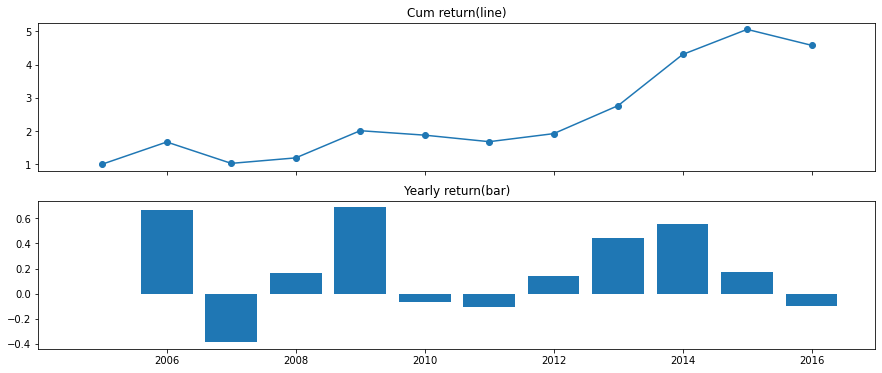

In [40]:
rtn_series, cum_rtn_series = get_return_series(selected_return_df)
plot_return(cum_rtn_series, rtn_series)